In [42]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans

In [43]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path) #read image from the source
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #converts colour space of image to RGB format

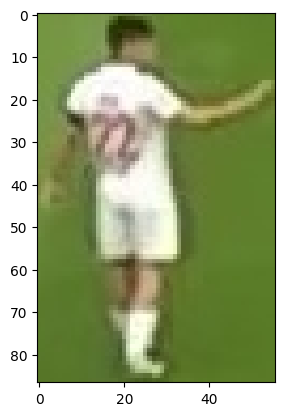

In [44]:
plt.imshow(image)

# Transform an image into 2 clusters

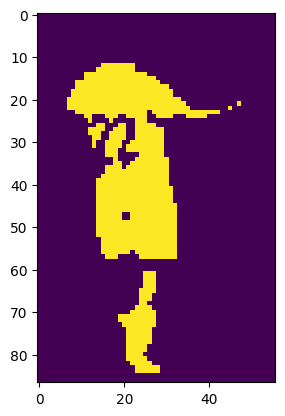

In [45]:
# Reshape image into a 2d arary
image_2d = image.reshape(-1, 3)

#perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#cluster labels
labels = kmeans.labels_

#reshape the labels into original image shape
clustered_image = labels.reshape(image.shape[0], image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()


In [46]:
#Identifying the color code for the background/grass pitch

corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)


#Identifying the color code for the player

player_cluster = 1 - non_player_cluster
print(player_cluster)


kmeans.cluster_centers_[player_cluster] 

0
1


array([219.25055432, 218.12749446, 197.94789357])